# Pre-trained Deep Learning Models!

## What are pre-trained Models?

- The landscape of deep learning (DL) has evolved dramatically over the past decade.
- **Transitioning from traditional feed-forward neural networks** focused on training task-specific models **from scratch** to **transformer** architectures that leverage massive **pre-trained models** capable of adapting to diverse applications through fine-tuning and prompting.
- This **paradigm shift** has **revolutionized performance across domains while fundamentally changing how AI systems are developed and deployed**.

<img src="https://media.beehiiv.com/cdn-cgi/image/fit=scale-down,format=auto,onerror=redirect,quality=80/uploads/asset/file/cecbccba-6358-476e-9fd8-e2807de9f220/Frame_118.png?t=1693044751" width=500>

Founded in 2016

Thousands of models (e.g., BERT, ChatGPT) you can use **without training from scratch**!

[Go to Hugging Face](https://huggingface.co/) and explore [the pre-trained models available on the website](https://huggingface.co/models).



## Popularity Ranking of DL Architectures (as of 2025)

| Rank | Architecture     | Popularity               | Primary Use Cases                                        |
|------|------------------|--------------------------|----------------------------------------------------------|
| 1️⃣   | Transformers      | ⭐⭐⭐⭐⭐ *(most popular)*    | LLMs, NLP, vision, audio, multimodal                     |
| 2️⃣   | CNNs              | ⭐⭐⭐⭐                     | Image classification, object detection, vision tasks     |
| 3️⃣   | GANs              | ⭐⭐⭐                      | Image generation, style transfer, data augmentation      |
| 4️⃣   | RNNs / LSTMs      | ⭐⭐                       | Legacy NLP, time series prediction, audio modeling       |


# CNNs: Convolutional Neural Networks

## Image classification, detection, vision

<img src="https://hips.hearstapps.com/hmg-prod/images/pembroke-welsh-corgi-royalty-free-image-1726720011.jpg?crop=1.00xw:0.756xh;0,0.134xh&resize=1024:">

### [ResNet-50 v1.5](https://huggingface.co/microsoft/resnet-50)

"ResNet (Residual Network) is a convolutional neural network. ResNet model pre-trained on ImageNet-1k at resolution 224x224."

- 1,000 object categories (classes)
- 1.2 million training images
- 50,000 validation images


In [14]:
import warnings
warnings.filterwarnings("ignore")

from transformers import pipeline
import torch

import textwrap # print output in multiple lines

In [15]:
# Check for CUDA (GPU)
device = 0 if torch.cuda.is_available() else -1  # 0 for GPU, -1 for CPU
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

# Load image classification pipeline with ResNet-50 (CNN)
classifier = pipeline(
    "image-classification",
    model="microsoft/resnet-50",
    device=device,
    use_fast=True  # Use the fast image processor to avoid the warning
)

# Classify the image
result = classifier("https://hips.hearstapps.com/hmg-prod/images/pembroke-welsh-corgi-royalty-free-image-1726720011.jpg")

for item in result:
    print(f"Label: {item['label']}, Score: {item['score']:.4f}")

Using device: GPU


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Label: Pembroke, Pembroke Welsh corgi, Score: 0.9997
Label: Cardigan, Cardigan Welsh corgi, Score: 0.0001
Label: papillon, Score: 0.0000
Label: Lhasa, Lhasa apso, Score: 0.0000
Label: Eskimo dog, husky, Score: 0.0000


<img src="https://consumer-cms.petfinder.com/sites/default/files/images/content/Golden%20Retriever%201.jpg">

In [16]:
# create labels for the above dog

result = classifier("https://hips.hearstapps.com/hmg-prod/images/pembroke-welsh-corgi-royalty-free-image-1726720011.jpg")

for item in result:
    print(f"Label: {item['label']}, Score: {item['score']:.4f}")

Label: Pembroke, Pembroke Welsh corgi, Score: 0.9997
Label: Cardigan, Cardigan Welsh corgi, Score: 0.0001
Label: papillon, Score: 0.0000
Label: Lhasa, Lhasa apso, Score: 0.0000
Label: Eskimo dog, husky, Score: 0.0000


<img src="https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg">

In [17]:
# try the above image. what labels do you expect?
# https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg


result = classifier("https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg")

for item in result:
    print(f"Label: {item['label']}, Score: {item['score']:.4f}")




Label: suit, suit of clothes, Score: 0.9014
Label: military uniform, Score: 0.0411
Label: bearskin, busby, shako, Score: 0.0206
Label: groom, bridegroom, Score: 0.0082
Label: torch, Score: 0.0032


Try a different method (Transformer) ...

### [CLIP model](https://huggingface.co/docs/transformers/en/model_doc/clip)

"CLIP is a is a multimodal vision and language model motivated by **overcoming the fixed number of object categories** when training a computer vision model. CLIP learns about images directly from raw text by jointly training on 400M (image, text) pairs. Pretraining on this scale enables **zero-shot transfer** to downstream tasks." Developed by the OpenAI organization.

This is a **transformer**-based model.

In [18]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch, requests

# Load model & processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

# Image and candidate captions
image = Image.open(requests.get(
    "https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg",
    stream=True).raw)

texts = ["a photo of BTS",
         "a photo of a dog",
         "a photo of a band",
         "a group of men"]

# Predict
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True).to(device)
probs = model(**inputs).logits_per_image.softmax(dim=1)[0]

# Display results
print("\n CLIP Similarity Scores:")
for text, p in zip(texts, probs):
    print(f"{text:<25} -> {p:.4f}")


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]


 CLIP Similarity Scores:
a photo of BTS            -> 0.9334
a photo of a dog          -> 0.0000
a photo of a band         -> 0.0195
a group of men            -> 0.0471


<img src="https://s.yimg.com/ny/api/res/1.2/UrUx_Vbbk413oGzvWSklPA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTI0MDA7aD0xNjAw/https://media.zenfs.com/en/parade_250/0b28a903a2ed548d063f996165786cd4">

In [19]:
# Try the above image. Who is this person?

from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch, requests

# Load model & processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

# Image and candidate captions
image = Image.open(requests.get(
    "https://s.yimg.com/ny/api/res/1.2/UrUx_Vbbk413oGzvWSklPA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTI0MDA7aD0xNjAw/https://media.zenfs.com/en/parade_250/0b28a903a2ed548d063f996165786cd4",
    stream=True).raw)

texts = ["a photo of BTS",
         "a photo of a dog",
         "a photo of a band",
         "a group of men",
         "an actor",
         "Brad Pitt"]

# Predict
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True).to(device)
probs = model(**inputs).logits_per_image.softmax(dim=1)[0]

# Display results
print("\n CLIP Similarity Scores:")
for text, p in zip(texts, probs):
    print(f"{text:<25} -> {p:.4f}")








 CLIP Similarity Scores:
a photo of BTS            -> 0.0000
a photo of a dog          -> 0.0007
a photo of a band         -> 0.0000
a group of men            -> 0.0001
an actor                  -> 0.0274
Brad Pitt                 -> 0.9718


# Transformers: LLMs / Attention-Based Models

## Sentiment analysis


[distilbert/distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)

In [20]:
from transformers import pipeline

sentiment = pipeline("sentiment-analysis",
                     model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

print(sentiment("This product is awful and I want a refund."))
print(sentiment("Average experience, nothing special."))
print(sentiment("Absolutely love the new update!"))

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9997561573982239}]
[{'label': 'NEGATIVE', 'score': 0.9992826581001282}]
[{'label': 'POSITIVE', 'score': 0.9998685121536255}]


In [21]:
# Try a different sentence for sentiment analysis

from transformers import pipeline

sentiment = pipeline("sentiment-analysis",
                     model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

print(sentiment("My wife is very thoughtful and sometimes I feel I am very lucky."))
print(sentiment("I am always succeding to separate the rational message from the emotional bits on these days."))
print(sentiment("Great times to live now!"))


Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998458623886108}]
[{'label': 'NEGATIVE', 'score': 0.9946538209915161}]
[{'label': 'POSITIVE', 'score': 0.9998810291290283}]


## Emotion Detection
Use case: Go beyond "positive/negative" — detect emotions like joy, anger, sadness

<img src="https://webflow-amber-prod.gumlet.io/620e4101b2ce12a1a6bff0e8/66ab6846124b51c486c24b3e_640f1bb03074900cbf0f28f3_What-are-the-Ivy-League-schools.webp">

In [22]:
emotion = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)
result = emotion("I can't believe I got in! I'm so happy and feel very grateful.")

for row in result:
    for item in row:
        print(f"{item['label']:<10} -> {item['score']:.4f}")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


joy        -> 0.9654
surprise   -> 0.0266
sadness    -> 0.0028
neutral    -> 0.0024
anger      -> 0.0019
disgust    -> 0.0005
fear       -> 0.0005


In [23]:
# Try another expression for Emotion Detection

emotion = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)
result = emotion("Two loves I have of comfort and despair, Which like two spirits do suggest me still The better angel is a man right fair, The worser spirit a woman coloured ill.")

for row in result:
    for item in row:
        print(f"{item['label']:<10} -> {item['score']:.4f}")




Device set to use cuda:0


fear       -> 0.7036
sadness    -> 0.2703
neutral    -> 0.0118
joy        -> 0.0061
surprise   -> 0.0033
disgust    -> 0.0026
anger      -> 0.0023


## Text Generation / Chatbots

Use case: Writing, storytelling, character dialogue

In [24]:
from transformers import pipeline
import torch

# Use GPU if available
device = 0 if torch.cuda.is_available() else -1

# Create text generation pipeline (defaults to GPT-2)
generator = pipeline("text-generation", model="gpt2", device=device)

# Generate text
output = generator(
    "Once upon a time in Bucharest ...",
    max_length=500,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

wrapped = textwrap.fill(output[0]["generated_text"], width=80)
print("\n Generated Text:\n" + "-"*80)
print(wrapped)
print("-"*80)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0



 Generated Text:
--------------------------------------------------------------------------------
Once upon a time in Bucharest ... two men from a foreign country, a British
diplomat, came up to me in Bucharest and asked me about the situation. … We
talked all the evening about the country's plight and also the difficulties,
some of them serious. The Germans asked for money to pay the refugees, so that
they could see what was going on in their country."  The story goes on to
suggest that in spite of all these difficulties, Romania was happy until its
economy crashed after the fall of the Soviet Union in 1991. The story went on to
suggest that during this period of recession, not just the Bucharest
authorities, but also the entire country fell into the hands of pro-British
forces, and that the communist bloc began taking over.  According to those
reports, Romanian businessmen were sent to Moscow, in return for helping NATO in
its early campaigns against Hitler.  Despite such an obvious

In [25]:
# Try to generate different texts
from transformers import pipeline
import torch

# Use GPU if available
device = 0 if torch.cuda.is_available() else -1

# Create text generation pipeline (defaults to GPT-2)
generator = pipeline("text-generation", model="gpt2", device=device)

# Generate text
output = generator(
    "The foreign cyberforces are relentlessly launch waves of ...",
    max_length=500,
    truncation=True,
    pad_token_id=generator.tokenizer.eos_token_id
)

wrapped = textwrap.fill(output[0]["generated_text"], width=80)
print("\n Generated Text:\n" + "-"*80)
print(wrapped)
print("-"*80)






Device set to use cuda:0



 Generated Text:
--------------------------------------------------------------------------------
The foreign cyberforces are relentlessly launch waves of ... More  A senior
Chinese military official said Wednesday that the United States will respond to
any threat through cyber force operations rather than by cyber commandos, saying
the U.S. believes China and Japan have a "strategic relationship and are closely
involved." The official stressed that the Obama Administration remains "open for
business" in cyberspace. He said in an email, "the United States will continue
to invest in intelligence, cyber, and security of the Internet as opposed to
cyber threats to the world." The official added that China has been "extremely
cautious" in its security posture, where it will avoid retaliatory measures, but
added that other nations were working with the U.S. "to respond aggressively...
More  A Japanese military aircraft is seen at the base of Marine Corps Base
Joint Base Pearl Harbor in Haw

## Image Captioning
Use case: Describe an image using natural language using the [the BLIP model](https://huggingface.co/docs/transformers/en/model_doc/blip)

BLIP is a model that is able to perform various multi-modal tasks including:

- Visual Question Answering
- Image-Text retrieval (Image-text matching)
- Image Captioning

<img src="https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg">

In [26]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

image = Image.open(requests.get("https://people.com/thmb/TlNhUj4fJ8pnJNpEvUN-015Jcac=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(979x595:981x597):format(webp)/bts-members-1-03a9c478f1794c448bcb5f74bf94812c.jpg", stream=True).raw)

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

inputs = processor(image, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

btt members at the grammys


btt? not BTS?

Oops! That looks like a hallucination from the model.

Advanced models (e.g., [BLIP 2](https://huggingface.co/docs/transformers/en/model_doc/blip-2)) are more accurate.

## Audio Transcription (Speech-to-Text)
Use case: Convert speech into text using Whisper.

[openai/whisper-small](https://huggingface.co/openai/whisper-small) is a pre-trained model for automatic speech recognition (ASR) and speech translation.

In [27]:
from IPython.display import Audio, display

# Direct link to the audio file
audio_url = "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"

# Embed audio player
display(Audio(audio_url))

In [28]:
asr = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small",
    generate_kwargs={"task": "translate", "language": "en"}
)

output = asr("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

wrapped_text = textwrap.fill(output["text"], width=80)

print("Transcription:\n")
print(wrapped_text)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Device set to use cuda:0
You have passed task=translate, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=translate.


Transcription:

 I have a dream that one day this nation will rise up and live out the true
meaning of its creed.


## Translation

In [29]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ro")
text = "I Love You All! Nothing is impossible, the word itself says I'm possible."

translation = translator(text)[0]['translation_text']
print(translation)

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/789k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/817k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


Nimic nu este imposibil, cuvântul în sine spune că sunt posibil.


# GANs: Generative Adversarial Networks -- This is process heavy ... taking very long :(

Image generations (DALL·E (OpenAI))

In [30]:
# install required packages for deep learning
#!pip install -q huggingface_hub[hf_xet]

[Stable Diffusion 2.1 Version](https://huggingface.co/spaces/stabilityai/stable-diffusion) on Huggingface

Using device: cuda


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image... please wait ⏳


  0%|          | 0/50 [00:00<?, ?it/s]

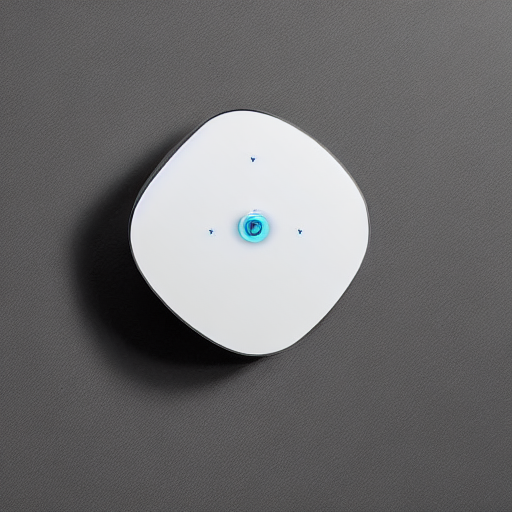

In [31]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the model (use full ID: CompVis/stable-diffusion-v1-4)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    low_cpu_mem_usage=True  # helps on CPU!
).to(device)

# Prompt
prompt = "A futuristic smart home device in minimal style product photography"

# Generate
print("Generating image... please wait ⏳")
image = pipe(prompt).images[0]

# Display
display(image)


Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image... please wait ⏳


  0%|          | 0/50 [00:00<?, ?it/s]

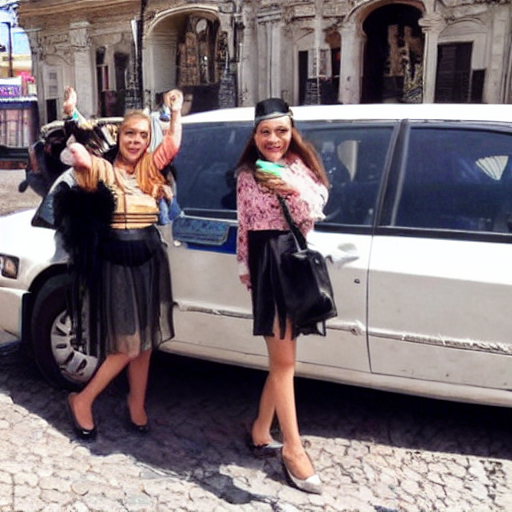

In [32]:
# Try another prompt (e.g., A futuristic intelligent vehicle)


from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the model (use full ID: CompVis/stable-diffusion-v1-4)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    low_cpu_mem_usage=True  # helps on CPU!
).to(device)

# Prompt
prompt = "Romanian country girls hailing for a uber"

# Generate
print("Generating image... please wait ⏳")
image = pipe(prompt).images[0]

# Display
display(image)





In [37]:
import nbformat
from nbconvert import HTMLExporter
from google.colab import files

# Load the current notebook
notebook_filename = "Remus_SAMOILA_3_DeepLearning_Pretrained.ipynb"  # <- Replace this with your actual notebook name

with open(notebook_filename, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Save the HTML to file
html_filename = notebook_filename.replace(".ipynb", ".html")
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

# Offer it for download
files.download(html_filename)


KeyError: 'state'